In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
path_01 = 'kalman_filter_test_data/J0006_0014_0051_20110128121318_cell_14.csv'
path_02 = 'kalman_filter_test_data/J0006_0015_0039_20110127010520_cell_3.csv'
path_03 = 'kalman_filter_test_data/J0006_0017_0193_20110218041739_cell_16.csv'
path_04 = 'kalman_filter_test_data/J0006_0081_0527_20110809043129_cell_1.csv'

In [25]:
df_01 = pd.read_csv(path_01)
df_02 = pd.read_csv(path_02)
df_03 = pd.read_csv(path_03)
df_04 = pd.read_csv(path_04)

df_01 = df_01['Resistance']
df_02 = df_02['Resistance']
df_03 = df_03['Resistance']
df_04 = df_04['Resistance']

In [26]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [27]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1] = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

In [28]:
# Initialization for system model.
A = 1
H = 1
Q = 0.1
R = 7
# Initialization for estimation.
n=10
P_0 = 6

In [29]:
n_samples = len(df_01)
x_0 = df_01[1]  # 14 for book.

volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    z_meas = df_01[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
    
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

for i in range(n_samples):
    x_meas = volt_esti_save[i]
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

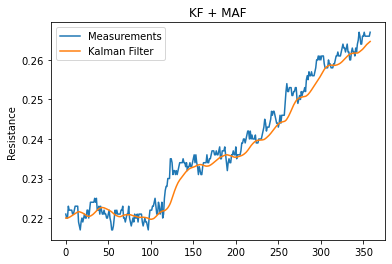

In [30]:
plt.plot(volt_meas_save, label='Measurements')
plt.plot(x_avg_save, label='Kalman Filter')
plt.legend(loc='upper left')
plt.title('KF + MAF')
plt.ylabel('Resistance')
plt.savefig('filter_png/KF_MAF_01.png')
#plt.savefig('png/simple_kalman_filter.png')

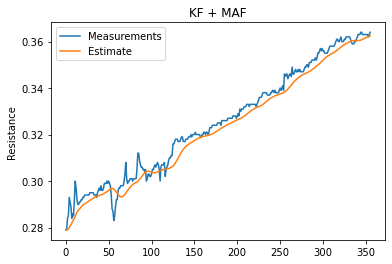

In [31]:
n_samples = len(df_02)
x_0 = df_02[1]  # 14 for book.

volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    z_meas = df_02[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
    
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

for i in range(n_samples):
    x_meas = volt_esti_save[i]
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

plt.plot(volt_meas_save, label='Measurements')
plt.plot(x_avg_save, label='Estimate')
plt.legend(loc='upper left')
plt.title('KF + MAF')
plt.ylabel('Resistance')
plt.savefig('filter_png/KF_MAF_02.png')
#plt.savefig('png/simple_kalman_filter.png')

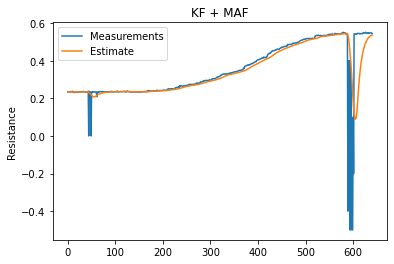

In [32]:
n_samples = len(df_03)
x_0 = df_03[1]  # 14 for book.

volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    z_meas = df_03[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti
    
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

for i in range(n_samples):
    x_meas = volt_esti_save[i]
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

plt.plot(volt_meas_save, label='Measurements')
plt.plot(x_avg_save, label='Estimate')
plt.legend(loc='upper left')
plt.title('KF + MAF')
plt.ylabel('Resistance')
plt.savefig('filter_png/KF_MAF_03.png')
#plt.savefig('png/simple_kalman_filter.png')

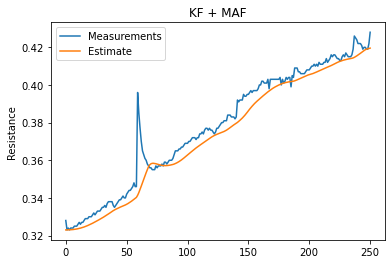

In [33]:
n_samples = len(df_04)
x_0 = df_04[1]  # 14 for book.

volt_meas_save = np.zeros(n_samples)
volt_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    z_meas = df_04[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    volt_meas_save[i] = z_meas
    volt_esti_save[i] = x_esti

x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

for i in range(n_samples):
    x_meas = volt_esti_save[i]
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

plt.plot(volt_meas_save, label='Measurements')
plt.plot(x_avg_save, label='Estimate')
plt.legend(loc='upper left')
plt.title('KF + MAF')
plt.ylabel('Resistance')
plt.savefig('filter_png/KF_MAF_04.png')
#plt.savefig('png/simple_kalman_filter.png')